## Classification section


CENSUS DATASET
----------------------------
In this first part, we are going to work with the census dataset. In this case we are going to develop some classification models that will predict whether income of a given individual will exceeds $50K/yr (class 1) or not (class 0) based on census data.

**Data Set Characteristics:**

    Number of Attributes: 10

    Attribute Information:
        - age           
        - workclass      
            - Private 
            - Self-emp-not-inc 
            - Self-emp-inc  
            - Federal-gov 
            - Local-gov 
            - State-gov 
            - Without-pay 
            - Never-worked            
        - education (in ascending order)
            - Preschool
            - 1st-4th 
            - 5th-6th 
            - 7th-8th 
            - 9th 
            - 10th
            - 11th
            - 12th
            - HS-grad 
            - Some-college 
            - Assoc-voc 
            - Assoc-acdm 
            - Bachelors 
            - Masters 
            - Prof-school 
            - Doctorate  
        - marital.status
            - Married-civ-spouse 
            - Divorced 
            - Never-married 
            - Separated 
            - Widowed 
            - Married-spouse-absent 
            - Married-AF-spouse 
         -occupation 
             - Tech-support 
             - Craft-repair 
             - Other-service 
             - Sales, Exec-managerial 
             - Prof-specialty 
             - Handlers-cleaners 
             - Machine-op-inspct 
             - Adm-clerical 
             - Farming-fishing 
             - Transport-moving 
             - Priv-house-serv 
             - Protective-serv 
             - Armed-Forces
       - sex  
             - Female
             - Male
       - fnlwgt (continous)
       - capital-gain (continous)
       - capital-loss (continous)
       - hours-per-week (continous)
       

The target variable is the income category.

The csv file 'data_vf.csv' can be found in the GitHub. If you are going to work in your local computer, you should indicate the relative address of the csv file from the folder in which you have your working notebook. 


In [1]:
#LIBRARIES USED THROUGHOUT THE NOTEBOOK
import ssl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, RANSACRegressor, LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_percentage_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats import skew


In [2]:
df = pd.read_csv("/Users/manuelmena/IE/data_vf.csv")

Check if there are any missing values in the different columns.

In [3]:
df.isnull().sum()

age                540
workclass         1836
fnlwgt               0
education            0
marital.status       0
occupation        1843
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

We should take into account that in the dataframe we have both numerical and categorical attributes. Fill the voids of numerical attributes using only the rest of numerical attributes with a KNN approach with 5 neighbors and a weigthed approach).

(The numerical attributes are ['age',  'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'] that are columns with indexes [0,2,7,8,9], iloc works with numerical indexes, so you may select the specific columns as df.iloc[:,[0,2,7,8,9]])

In [4]:
imputer = KNNImputer(n_neighbors=5, weights="distance")
df.iloc[:,[0,2,7,8,9]] = imputer.fit_transform(df.iloc[:,[0,2,7,8,9]])



Fill the categorical attributes with one of the following approaches:
- Fill them using the most frequent approach or
- Create a unique class for the missing values (therefore, fill the voids of 'workclass' by an specific category called 'Missing_wc' and do the same for the 'occupation' class but using a 'Missing_occ' class).

In [5]:
#Find the categorical variables in the dataset
df.select_dtypes(exclude=["number","bool_", "int_"]).columns

Index(['workclass', 'education', 'marital.status', 'occupation', 'sex'], dtype='object')

In [6]:
#Using the most frequent approach
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(df.iloc[:,[1,3,4,5,6]])
df.iloc[:,[1,3,4,5,6]] = imr.transform(df.iloc[:,[1,3,4,5,6]])

## Analysis
We are going to analyse the distribution of the different attributes from a graphical point of view.
Plot an histogram of the numerical variables and also a boxplot of the numerical ones depending on the value of the income category.

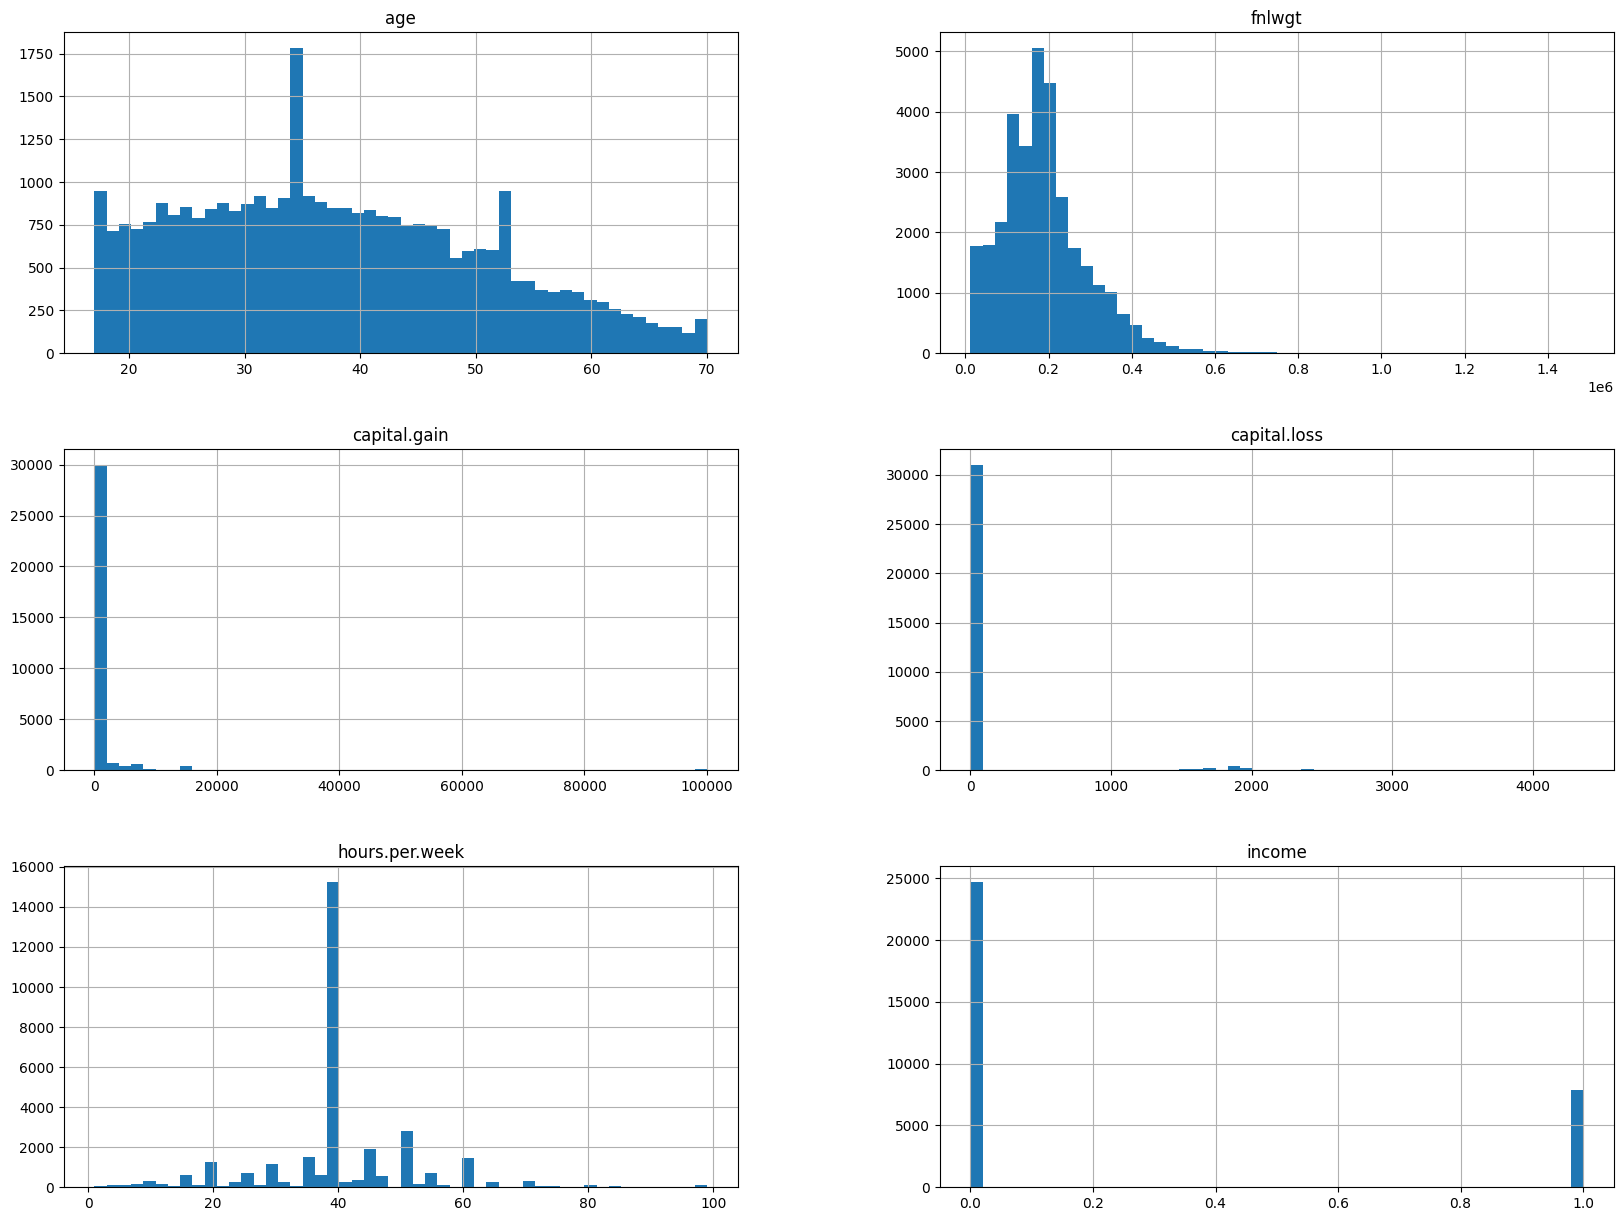

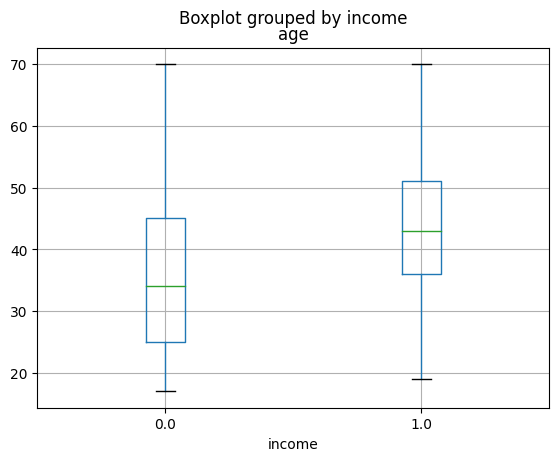

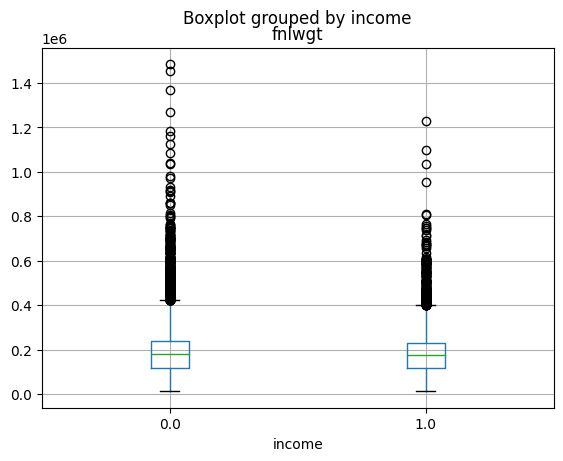

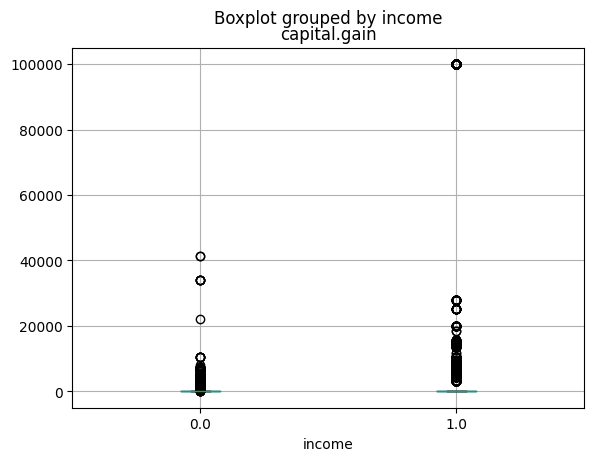

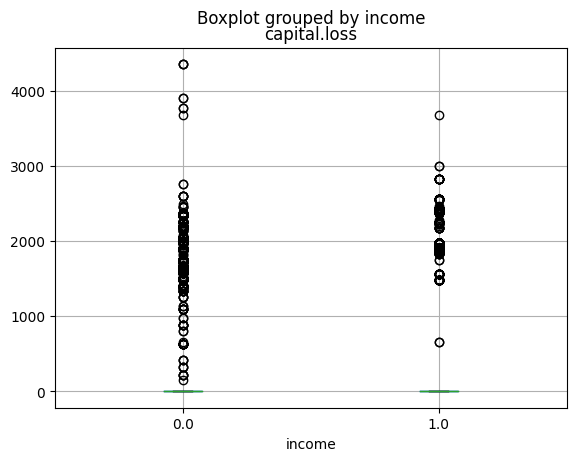

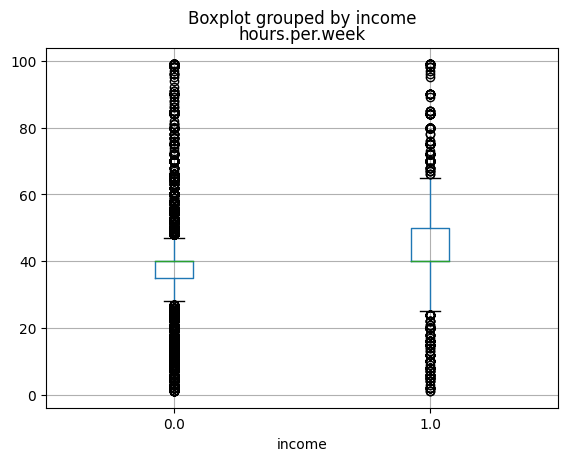

In [7]:
#Plot an histogram of the numerical variables and

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns= df.iloc[:,:].select_dtypes(include=numerics).columns.tolist()
non_numerics = ['object']
non_numeric_columns= df.iloc[:,:].select_dtypes(include=non_numerics).columns.tolist()
#-----Complete the code and show the requested plots----
#Histograms
df[numeric_columns].hist(bins=50, figsize=(20,15))
plt.show()
#Plot a boxplot of the numerical ones depending on the value of the income category.
for i in numeric_columns:
    if i == 'income':
        pass
    else:
        df.boxplot(column=i, by='income')
        plt.show()




For the categorical attributes, print on screen the mean of the income per value of each of the classes.

In [8]:
for i in non_numeric_columns:
    print(df.groupby(i)['income'].mean())

workclass
Federal-gov         0.386458
Local-gov           0.294792
Never-worked        0.000000
Private             0.210093
Self-emp-inc        0.557348
Self-emp-not-inc    0.284927
State-gov           0.271957
Without-pay         0.000000
Name: income, dtype: float64
education
10th            0.066452
11th            0.051064
12th            0.076212
1st-4th         0.035714
5th-6th         0.048048
7th-8th         0.061920
9th             0.052529
Assoc-acdm      0.248360
Assoc-voc       0.261216
Bachelors       0.414753
Doctorate       0.740920
HS-grad         0.159509
Masters         0.556587
Preschool       0.000000
Prof-school     0.734375
Some-college    0.190235
Name: income, dtype: float64
marital.status
Divorced                 0.104209
Married-AF-spouse        0.434783
Married-civ-spouse       0.446848
Married-spouse-absent    0.081340
Never-married            0.045961
Separated                0.064390
Widowed                  0.085599
Name: income, dtype: float64
occupati

Plot a heatmap of the absolute value of the correlations among the numerical columns of the dataframe (include the target)

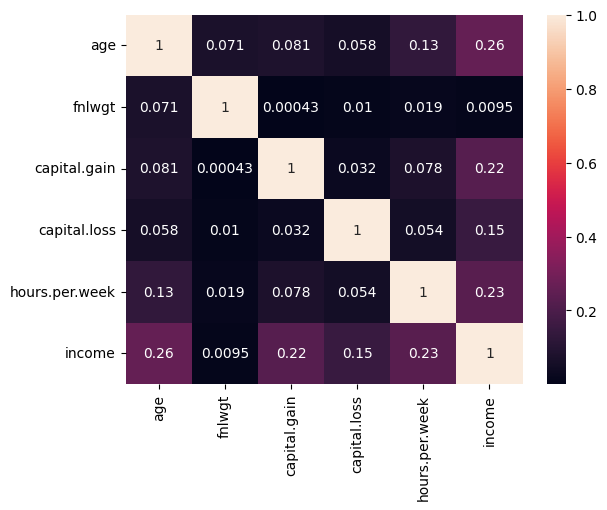

In [9]:
corr = df.corr()
sns.heatmap(corr.abs(), annot=True)
plt.show()

## Encoding

We know that one of the categorical variables, 'education' is an ordinal variable as it follows the order that we saw at the beginning of the exercise:

- Preschool
- 1st-4th 
- 5th-6th 
- 7th-8th 
- 9th 
- 10th
- 11th
- 12th
- HS-grad 
- Some-college 
- Assoc-voc 
- Assoc-acdm 
- Bachelors 
- Masters 
- Prof-school 
- Doctorate  

Create a mapping between the referred value and it associate number (coding 'Preschool' as 1, '1st-4th' as 2,..., til 'Doctorate' as 16 ) and create a new numerical column called 'education_num' using the created mapping.

In [12]:
education_mapping = {'Preschool': 1, 
    '1st-4th': 2, 
    '5th-6th': 3, 
    '7th-8th': 4, 
    '9th': 5, 
    '10th': 6, 
    '11th': 7, 
    '12th': 8, 
    'HS-grad': 9, 
    'Some-college': 10, 
    'Assoc-voc': 11, 
    'Assoc-acdm': 12, 
    'Bachelors': 13, 
    'Masters': 14, 
    'Prof-school': 15, 
    'Doctorate': 16}
df['education_num'] = df['education'].map(education_mapping)
df.drop(['education'], axis=1, inplace=True)

We have now to encode the rest of the categorical attributes (['workclass', 'marital.status','occupation', 'sex']). We are going to follow a one hot enconding approach to deal with these categorical variables. Do not forget to get rid of the base category.

In [13]:
print(non_numeric_columns)

['workclass', 'education', 'marital.status', 'occupation', 'sex']


In [14]:
non_numeric_columns = [x for x in non_numeric_columns if x != 'education']
print(non_numeric_columns)
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)



['workclass', 'marital.status', 'occupation', 'sex']


In [36]:
df

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,income,education_num,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Male
0,32.800996,77053.0,0.0,4356.0,40.0,0.0,9,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,35.750186,132870.0,0.0,4356.0,18.0,0.0,9,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,66.000000,186061.0,0.0,4356.0,40.0,0.0,10,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,54.000000,140359.0,0.0,3900.0,40.0,0.0,4,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,41.000000,264663.0,0.0,3900.0,40.0,0.0,10,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.000000,310152.0,0.0,0.0,40.0,0.0,10,0,0,1,...,0,0,0,0,0,1,0,0,0,1
32557,27.000000,257302.0,0.0,0.0,38.0,0.0,12,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,40.000000,154374.0,0.0,0.0,40.0,1.0,9,0,0,1,...,0,1,0,0,0,0,0,0,0,1
32559,58.000000,151910.0,0.0,0.0,40.0,0.0,9,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Select only the numerical columns (meaning that if you still have any categorical ones) and create a dataframe for the attributes called X and one for the targets called y.

In [15]:
cols_x= [x for x in df.columns if x != 'income']
X=df[cols_x]
y=df.income

Split the overal dataframe in a training dataset (with a 70% of the data) and a testing dataset. Assure that both the training and testing dataset are stratified depending on the value of the target. Set a seed equal to 1234 to be able to reproduce results.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1234, stratify=y)

## Transforming and scaling phase

Analyse if any of the variables will be well suited to be transformed using a logarithm transformation (Obviously you should apply both to the training a testing sets). Which one(s) could be good candidates? Why? (If you think that no attribute is a good fit for being applied a log transform, justify it)

Now, once we may have already performed the transformation to SOME (NOT ALL) the attributes, we are going to standarize all the columns. BE SURE that you apply exactly the same operation to the training and testing subsets considering only the training data

In [17]:
#Look at skewness of the variables
for i in X_train.columns:
    aux = skew(X_train[i])
    if aux >= 1:
       print(f'{i} is highly skewed. Skewness of {aux}%')
    
zeros = (X_train == 0).mean() * 100
print("Percentage of zeros in each column")
print(zeros)



#Looking at the skewness of the variables, many are skewed enough to justify a log transformation,
#however, the only one that does not have many zeros is the fnlwgt variable, so thats the only one i will transform. 

X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])


#Scaling
for i in X_train.columns:
    StandardScaler().fit_transform(X_train[[i]])
for i in X_test.columns:
    StandardScaler().fit_transform(X_test[[i]])







fnlwgt is highly skewed. Skewness of 1.4196021376932575%
capital.gain is highly skewed. Skewness of 12.448428490377992%
capital.loss is highly skewed. Skewness of 4.596305298303043%
workclass_Local-gov is highly skewed. Skewness of 3.559320953689984%
workclass_Never-worked is highly skewed. Skewness of 61.60898416616081%
workclass_Self-emp-inc is highly skewed. Skewness of 5.1313712559699445%
workclass_Self-emp-not-inc is highly skewed. Skewness of 3.167598776418534%
workclass_State-gov is highly skewed. Skewness of 4.735172872090678%
workclass_Without-pay is highly skewed. Skewness of 47.70954243066084%
marital.status_Married-AF-spouse is highly skewed. Skewness of 36.574671957318145%
marital.status_Married-spouse-absent is highly skewed. Skewness of 8.664165989772226%
marital.status_Separated is highly skewed. Skewness of 5.385037840178796%
marital.status_Widowed is highly skewed. Skewness of 5.385037840178796%
occupation_Armed-Forces is highly skewed. Skewness of 61.60898416616081%


# Define a couple of Logistic regressor models



## First model

Our first model will be a logistic regresor considering only three features in the way 
$P(Y|X=(x_{1},x_{2},x_{3}))=\frac{e^{z}}{1+e^{z}}$ with $z=\beta_{0}+\beta_{1}\cdot x_{1}+\beta_{2}\cdot x_{2}+\beta_{3}\cdot x_{3}$.

### Which variable will you select and why?


In [18]:
corr_matrix = df.corr()
corr_with_target = corr_matrix['income'].abs().sort_values(ascending=False)
top_features = corr_with_target.head(6).index.tolist()
top_features.remove('income')
print(top_features)
#Here, I see that technically marital.status_Married-civ-spouse and marital.status_Never-married are amongst the three most correlated features of my dataset
#However, they are binary variables, so I will use age and hours per week instead, since they have a better range of values for my model to learn from. 
top_features.remove('marital.status_Married-civ-spouse')
top_features.remove('marital.status_Never-married')
print(top_features) #these are the features I will be using

['marital.status_Married-civ-spouse', 'education_num', 'marital.status_Never-married', 'age', 'hours.per.week']
['education_num', 'age', 'hours.per.week']


In [19]:
features_to_train = X_train[top_features]
features_to_test = X_test[top_features]
logreg = LogisticRegression(random_state=1234)
logreg.fit(features_to_train, y_train)
y_pred = logreg.predict(features_to_test)



Print on screen the principal metrics of the model, both against the testing and training datasets. Do you think it is overfitted?

Also print the confussion matrixes

In [20]:

train_pred = logreg.predict(features_to_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_confusion = confusion_matrix(y_train, train_pred)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_confusion = confusion_matrix(y_test, y_pred)

# Print metrics for both training and testing datasets
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-score: {train_f1:.2f}")
print(f"Confusion Matrix:\n{train_confusion}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{test_confusion}")

# Check for overfitting by comparing training and testing metrics
if train_accuracy > test_accuracy:
    print("\nThe model might be overfitting as the training accuracy is higher than the testing accuracy.")
else:
    print("\nThe model shows consistent performance on both training and testing datasets.")



Training Metrics:
Accuracy: 0.79
Precision: 0.62
Recall: 0.33
F1-score: 0.43
Confusion Matrix:
[[16212  1091]
 [ 3704  1785]]

Testing Metrics:
Accuracy: 0.79
Precision: 0.63
Recall: 0.32
F1-score: 0.43
Confusion Matrix:
[[6969  448]
 [1591  761]]

The model shows consistent performance on both training and testing datasets.


In [44]:
#In the context of overfitting, the model does not seem to be overfitting the data, 
#as the performance metrics are comparable between the training and testing datasets. 

#However, the relatively low recall score suggests that the model might benefit
# from further optimization, especially if correctly identifying positive cases is crucial for the application. 

Do you think that we have an imbalanced dataset? Print the number of elements per target class in the training subset and in the testing subset. If you think imbalance could be an issue (justify it) propose a model that takes this into account. Check the performance metrics of this model. Compare the performance metrics against the previous model. Does it behave as expected? Why/why not? 

In [21]:
print("Training subset:")
print(y_train.value_counts())
print("\nTesting subset:")
print(y_test.value_counts())

#There is a slight imbalance, since over 75% of the data is in the 0 class. 
#We are going to add the balanced parameter to the Logistic Regression model in order to fix this

logreg = LogisticRegression(class_weight='balanced', random_state=1234)
logreg.fit(features_to_train, y_train)
y_pred = logreg.predict(features_to_test)



train_pred = logreg.predict(features_to_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_confusion = confusion_matrix(y_train, train_pred)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_confusion = confusion_matrix(y_test, y_pred)

# Print metrics for both training and testing datasets
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-score: {train_f1:.2f}")
print(f"Confusion Matrix:\n{train_confusion}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{test_confusion}")

# Comparing the metrics of both models, we see that the accuracy and precision is slightly lower but the f1 score and recall are signiicantly higher in the balanced model. 
# Given this we can infer that the balanced model is better at classifying positive cases than the imbalanced model. This makes sense, as the balanced model has a more balanced sample of both negative and positive cases to learn from. 


Training subset:
0.0    17303
1.0     5489
Name: income, dtype: int64

Testing subset:
0.0    7417
1.0    2352
Name: income, dtype: int64
Training Metrics:
Accuracy: 0.72
Precision: 0.45
Recall: 0.72
F1-score: 0.56
Confusion Matrix:
[[12451  4852]
 [ 1511  3978]]

Testing Metrics:
Accuracy: 0.72
Precision: 0.45
Recall: 0.74
F1-score: 0.56
Confusion Matrix:
[[5332 2085]
 [ 623 1729]]


Develop a logistic regressor model with all the attributes. Print its performance metrics and the confussion matrix

In [22]:
logreg = LogisticRegression(class_weight='balanced', random_state=1234)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_confusion = confusion_matrix(y_train, train_pred)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_confusion = confusion_matrix(y_test, y_pred)

# Print metrics for both training and testing datasets
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-score: {train_f1:.2f}")
print(f"Confusion Matrix:\n{train_confusion}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{test_confusion}")



Training Metrics:
Accuracy: 0.77
Precision: 0.52
Recall: 0.75
F1-score: 0.61
Confusion Matrix:
[[13482  3821]
 [ 1362  4127]]

Testing Metrics:
Accuracy: 0.77
Precision: 0.52
Recall: 0.76
F1-score: 0.62
Confusion Matrix:
[[5778 1639]
 [ 564 1788]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Analyse its performance and compare it against the first two models we have defined. Write down your conclussions.


In [47]:
#This model seems to have the best performance, as it predicts well on both testing and training data, accuracy is still relatively, high, 
#recall as well, and precision has improved from the balanced model. F1 is also a bit higher.  

## Linear discriminant classifier

Define now a linear discriminant Analysis classifier with the structure of your first model (with 3 variables). Print on screen the perfomrmance metrics and the confussion Matrix. Analise the result and compare it against the similar logitic regressor model.

In [23]:

lda = LinearDiscriminantAnalysis()
features_to_train = X_train[top_features]
features_to_test = X_test[top_features]
# Train the model
lda.fit(features_to_train, y_train)

# Predict the test set results
y_pred = lda.predict(features_to_test)

train_pred = lda.predict(features_to_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_confusion = confusion_matrix(y_train, train_pred)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_confusion = confusion_matrix(y_test, y_pred)

# Print metrics for both training and testing datasets
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-score: {train_f1:.2f}")
print(f"Confusion Matrix:\n{train_confusion}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{test_confusion}")

Training Metrics:
Accuracy: 0.79
Precision: 0.63
Recall: 0.32
F1-score: 0.42
Confusion Matrix:
[[16267  1036]
 [ 3757  1732]]

Testing Metrics:
Accuracy: 0.79
Precision: 0.63
Recall: 0.31
F1-score: 0.42
Confusion Matrix:
[[6991  426]
 [1619  733]]


In [49]:
#Here, we can see that all the metrics are fairly similar to the logistic regression model, recall is still incredibly poor.

Define a linear discriminant model that uses all the possible variables as inputs to the model. Print on screen the different usual performance metrics and the confussion matrix.

In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
train_pred = lda.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_confusion = confusion_matrix(y_train, train_pred)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_confusion = confusion_matrix(y_test, y_pred)

# Print metrics for both training and testing datasets
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-score: {train_f1:.2f}")
print(f"Confusion Matrix:\n{train_confusion}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{test_confusion}")

Training Metrics:
Accuracy: 0.84
Precision: 0.71
Recall: 0.57
F1-score: 0.63
Confusion Matrix:
[[16004  1299]
 [ 2370  3119]]

Testing Metrics:
Accuracy: 0.84
Precision: 0.72
Recall: 0.57
F1-score: 0.63
Confusion Matrix:
[[6890  527]
 [1018 1334]]


## K-Nearest Neighbors

Now, define a KNN classifier with 10 neighbors and a distance strategy to evaluate the weight of the closest neighbors of the different observations. Compare the obtained results against the previous models.

In [25]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

train_pred = lda.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_confusion = confusion_matrix(y_train, train_pred)


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_confusion = confusion_matrix(y_test, y_pred)

# Print metrics for both training and testing datasets
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-score: {train_f1:.2f}")
print(f"Confusion Matrix:\n{train_confusion}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{test_confusion}")



Training Metrics:
Accuracy: 0.84
Precision: 0.71
Recall: 0.57
F1-score: 0.63
Confusion Matrix:
[[16004  1299]
 [ 2370  3119]]

Testing Metrics:
Accuracy: 0.85
Precision: 0.73
Recall: 0.62
F1-score: 0.67
Confusion Matrix:
[[6865  552]
 [ 893 1459]]


In [52]:
#Both my previous LDA model and this knn model have comparable accuracy on the testing dataset. The precision, recall, 
#and F1-score values are also quite similar between the two models. Given these metrics,
#it's challenging to declare one model definitively better than the other based solely on these results.

Propose a new set of hyperparameters (justify your decission) and check if it performs better in the testing dataset.

In [26]:

knn = KNeighborsClassifier(n_neighbors=10, weights = 'uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_confusion = confusion_matrix(y_test, y_pred)

#Metrics
print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")

#I have changed the weights from distance to uniform because in the previous version of the model, 
# distance would still be prone to be affected by outliers, where as the uniform weight is not
#Here the model actually seems to perform worse than the previous, although precision slightly increases, 
# accruacy remains nearly identical and recall has decreased substantially. 


Testing Metrics:
Accuracy: 0.85
Precision: 0.77
Recall: 0.56
F1-score: 0.65


Define a CV strategy with [4,6,8,10] to define a number of neighbors and ['distance', 'weight'] to define the weight considering all the variables and fit your problem. Which set of parameter the CV strategy suggests? Plot the performance metrics and the confussion matrix for the training and testing subsets.

Best Hyperparameters: {'n_neighbors': 10, 'weights': 'uniform'}
Training Metrics:
Accuracy: 0.87
Precision: 0.82
Recall: 0.60
F1-score: 0.69
Confusion Matrix:
[[16560   743]
 [ 2185  3304]]

Testing Metrics:
Accuracy: 0.85
Precision: 0.77
Recall: 0.56
F1-score: 0.65
Confusion Matrix:
[[7033  384]
 [1045 1307]]


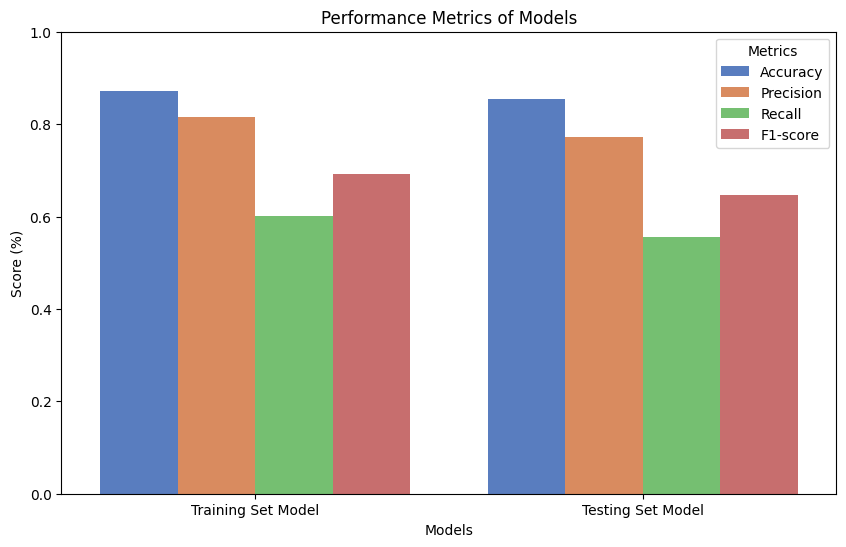

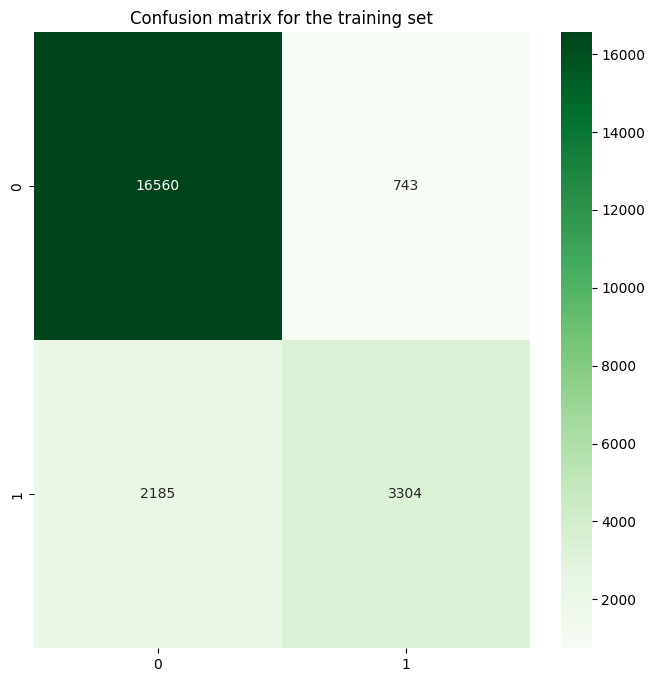

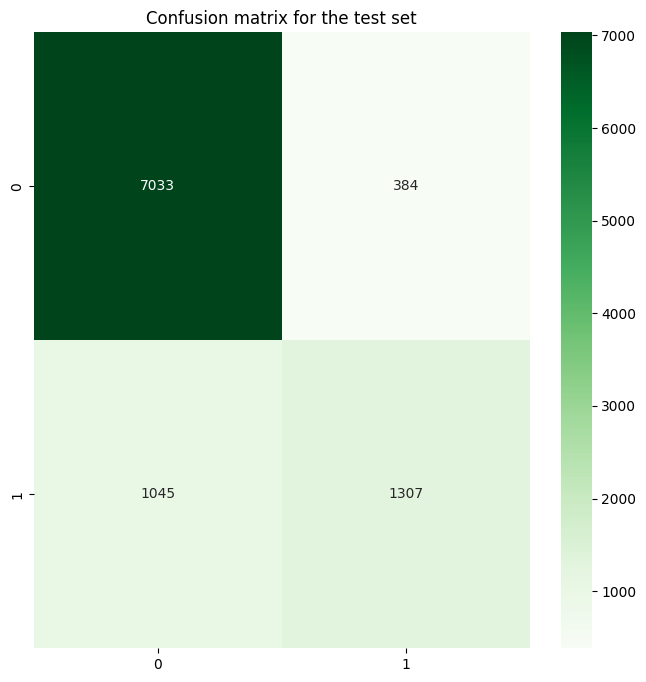

In [27]:
# Define the parameter grid to search
parameters = {'n_neighbors': [4,6,8,10],
              'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()


grid_cv = GridSearchCV(knn, param_grid=parameters, cv=5)


grid_cv.fit(X_train, y_train)


print(f"Best Hyperparameters: {grid_cv.best_params_}")

train_pred = grid_cv.predict(X_train)
y_pred = grid_cv.predict(X_test)


train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_confusion = confusion_matrix(y_train, train_pred)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_confusion = confusion_matrix(y_test, y_pred)

# Print metrics for both training and testing datasets
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-score: {train_f1:.2f}")
print(f"Confusion Matrix:\n{train_confusion}")

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-score: {test_f1:.2f}")
print(f"Confusion Matrix:\n{test_confusion}")

#PLOTS

#Metrics

data = {
    'Model': ['Training Set Model', 'Testing Set Model'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1, test_f1]
}

plots = pd.DataFrame(data)


melted_plots = pd.melt(plots, id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1-score'],
                    var_name='Metric', value_name='Value')



plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=melted_plots, palette='muted')

plt.title('Performance Metrics of Models')
plt.ylabel('Score (%)')
plt.xlabel('Models')
plt.ylim(0, 1) 
plt.legend(title='Metrics')
plt.show()



#Confusion Matrix

plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_train, train_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion matrix for the training set')
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion matrix for the test set')
plt.show()

## Regression section


California Housing dataset
--------------------------

We are going to work with the california dataset


**Data Set Characteristics:**

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000). (MedHouseVal)

In this case you do not have to load any dataset. We are going to work with the set that is in sklearn.datasets.

In [28]:
ssl._create_default_https_context = ssl._create_unverified_context
df = fetch_california_housing(as_frame=True).frame
X_hous,y_hous=df.iloc[:,:-1], df.iloc[:, -1]

**Divide the original dataset**

The training dataset should have a 70% of the observations and the testing dataset should have the remaining 30% of the observations. In order to have reproducible results, set the initial random state as 1234.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_hous, y_hous, test_size=.3, random_state=1234)


# Define a couple of Linear regressor models



## First model

Let's define a fist regression model that will be a linear regresor. This first model will be a linear regression with a single feature in the way 
$Y=\beta_{0}+\beta_{1}\cdot x_{1}$.

### Which variable will you select and why?

In [30]:
#Similar to our feature selection method for logistic regression, we will find the variable with the highest correlation 
#to our target and use that as our single feature for now. 

corr_matrix = df.corr()
corr_with_target = corr_matrix['MedHouseVal'].abs().sort_values(ascending=False)
top_feature = corr_with_target.head(2).index.tolist()
top_feature.remove('MedHouseVal')
print(top_feature)


#Based on the results, the best feature is MedInc (median income)


['MedInc']


#### Define the model with the variable you have selected.
As it was stated before, it should be a simple linear regressor with a single feature.

In [31]:
linreg = LinearRegression()
linreg.fit(X_train[['MedInc']], y_train)
y_pred = linreg.predict(X_test[['MedInc']])


Print the intercept of the model, the value of the parameter $\beta_{1}$ and the $R^{2}$ of the model

In [32]:
print(f"Intercept of the model is {linreg.intercept_}")
print(f"Value of the parameter beta_1 is {linreg.coef_}")
print(f"R^2 of the model is {linreg.score(X_test[['MedInc']], y_test)}")

Intercept of the model is 0.452557294028761
Value of the parameter beta_1 is [0.41662433]
R^2 of the model is 0.4639429860166334


Print the MAE, MSE and MAPE performance metrics of your model both in the testing and in the training datasets

In [33]:
train_pred = linreg.predict(X_train[['MedInc']])


print("Metrics for train set")
print(f"MAE with the training set is {mean_absolute_error(y_train, train_pred):0.03}")
print(f"MSE with the training set is {mean_squared_error(y_train, train_pred):0.03}")
print(f"MAPE with the training set is {round((mean_absolute_percentage_error(y_train, train_pred)),3)*100}%")

print("\nMetrics for test set")
print(f"MAE with the testing set is {mean_absolute_error(y_test, y_pred):0.03}")
print(f"MSE with testing set is {mean_squared_error(y_test, y_pred):0.03}")
print(f"MAPE with the testing set is {round((mean_absolute_percentage_error(y_test, y_pred)),3)*100}%")

#Seems model is not overtfitted

Metrics for train set
MAE with the training set is 0.625
MSE with the training set is 0.695
MAPE with the training set is 38.5%

Metrics for test set
MAE with the testing set is 0.628
MSE with testing set is 0.714
MAPE with the testing set is 38.7%


## Second Model-Define a Robust Linear Regressor model

Check if with a robust linear regressor we obtain a better performance with the same variable you have used in the previous section.

*Check with a residual_threshold of 1*

In [34]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_error', residual_threshold=1)
ransac.fit(X_train[['MedInc']], y_train)
y_pred = ransac.predict(X_test[['MedInc']])
print(f"Intercept of the model is {ransac.estimator_.intercept_}")
print(f"Value of the parameter beta_1 is {ransac.estimator_.coef_}")
print(f"R^2 of the model is {ransac.score(X_test[['MedInc']], y_test)}")

#Values here are all pretty similar except for the intercept, using this robust linear model gives us a lower intercept than the regular regression model.
#We will see the other metrcis below

Intercept of the model is 0.325544858277943
Value of the parameter beta_1 is [0.392478]
R^2 of the model is 0.4217069966312075


Print the same performance metrics that we asked in the previous section

In [35]:
train_pred = ransac.predict(X_train[['MedInc']])

print("Metrics for train set")
print(f"RANSAC MAE with the training set is {mean_absolute_error(y_train, train_pred):0.03}")
print(f"RANSAC MSE with the training set is {mean_squared_error(y_train, train_pred):0.03}")
print(f"RANSAC MAPE with the training set is {round((mean_absolute_percentage_error(y_train, train_pred)),3)*100}%")

print("\nMetrics for test set")
print(f"RANSAC MAE with the testing set is {mean_absolute_error(y_test, y_pred):0.03}")
print(f"RANSAC MSE with testing set is {mean_squared_error(y_test, y_pred):0.03}")
print(f"RANSAC MAPE with the testing set is {round((mean_absolute_percentage_error(y_test, y_pred)),3)*100}%")

#So the metrics are incredibly close to the regular regression we performed earlier, except for the MAPE in the training set, which here is about 5.5% lower. 
# in fact, the mean squared error of this model seems to be slightly worse than the regular model. 

Metrics for train set
RANSAC MAE with the training set is 0.612
RANSAC MSE with the training set is 0.746
RANSAC MAPE with the training set is 33.1%

Metrics for test set
RANSAC MAE with the testing set is 0.62
RANSAC MSE with testing set is 0.771
RANSAC MAPE with the testing set is 33.5%


Is the model better than the linear regressor? Does it generalize better? Does it behave as what you were expecting? Justify your answer.

## Third Model-Define a model with all the features, but apply a regularization technique that selects the best subset of them

Now, develop a linear regression model but using a regularization technique that make some of the parameters go to 0.

##### Which is the 'optimal' value of $\alpha$ ?

Select the value of the penalty parameter in order to optimize the performance of your model using a 5 folds cv approach. 
Print the value of your final $\alpha$ and the final $R^{2}$ score. Print the same perfomance metrics but for this sepcific model.



In [36]:

parameters = {'alpha': [0.001, 0.01, 0.05, 0.1, 1, 10]}

lasso = Lasso()

grid_cv = GridSearchCV(lasso, param_grid=parameters, cv=5)


grid_cv.fit(X_train, y_train)


print(f"Optimal value of alpha is {grid_cv.best_params_['alpha']}")
print(f"R^2 of the model is {round(grid_cv.best_score_, 2)}")

y_pred = grid_cv.predict(X_test)
train_pred = grid_cv.predict(X_train)


print("Metrics for train set")
print(f"MAE with the training set is {mean_absolute_error(y_train, train_pred):0.03}")
print(f"MSE with the training set is {mean_squared_error(y_train, train_pred):0.03}")
print(f"MAPE with the training set is {round((mean_absolute_percentage_error(y_train, train_pred)),3)*100}%")


print("\nMetrics for test set")
print(f"MAE with the testing set is {mean_absolute_error(y_test, y_pred):0.03}")
print(f"MSE with testing set is {mean_squared_error(y_test, y_pred):0.03}")
print(f"MAPE with the testing set is {round((mean_absolute_percentage_error(y_test, y_pred)),3)*100}%")



Optimal value of alpha is 0.001
R^2 of the model is 0.61
Metrics for train set
MAE with the training set is 0.532
MSE with the training set is 0.522
MAPE with the training set is 31.8%

Metrics for test set
MAE with the testing set is 0.526
MSE with testing set is 0.53
MAPE with the testing set is 31.2%
